In [14]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils

In [15]:
def convolve_im(im: np.array, kernel: np.array, verbose=True):
    """ Convolves the image (im) with the spatial kernel (kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution
        
        Note: kernel can be of different shape than im.

    Args:
        im: np.array of shape [H, W]
        kernel: np.array of shape [K, K] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)

    padding = (im.shape[0] - kernel.shape[0], im.shape[1] - kernel.shape[1])  # total amount of padding
    kernel = np.pad(kernel, (((padding[0]+1)//2, padding[0]//2), ((padding[1]+1)//2, padding[1]//2)), 'constant')
    fft_kernel = (np.fft.fft2(kernel))

    transformed = (np.fft.fft2(im) * fft_kernel)

    inversed = np.fft.ifft2(transformed)

    conv_result = np.real(inversed)
    
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))

        # Visualize original image
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")

        # Visualize FFT
        plt.subplot(1, 5, 2) 
        plt.imshow(abs(np.log(np.fft.fftshift(np.fft.fft2(im)))), cmap="gray")

        # Visualize FFT kernel
        plt.subplot(1, 5, 3)
        plt.imshow(np.log(1+abs((np.fft.fftshift(np.fft.fft2(kernel))))), cmap="gray")
        
        # Visualize filtered FFT image
        plt.subplot(1, 5, 4)
        plt.imshow(np.log(1+abs(np.fft.ifftshift(transformed))), cmap="gray")

        # Visualize filtered spatial image
        plt.subplot(1, 5, 5) 
        plt.imshow(np.fft.fftshift(np.real(inversed)), cmap="gray")

    ### END YOUR CODE HERE ###
    return conv_result

Saving image to: image_processed/camera_gaussian.png
Saving image to: image_processed/camera_sobelx.png


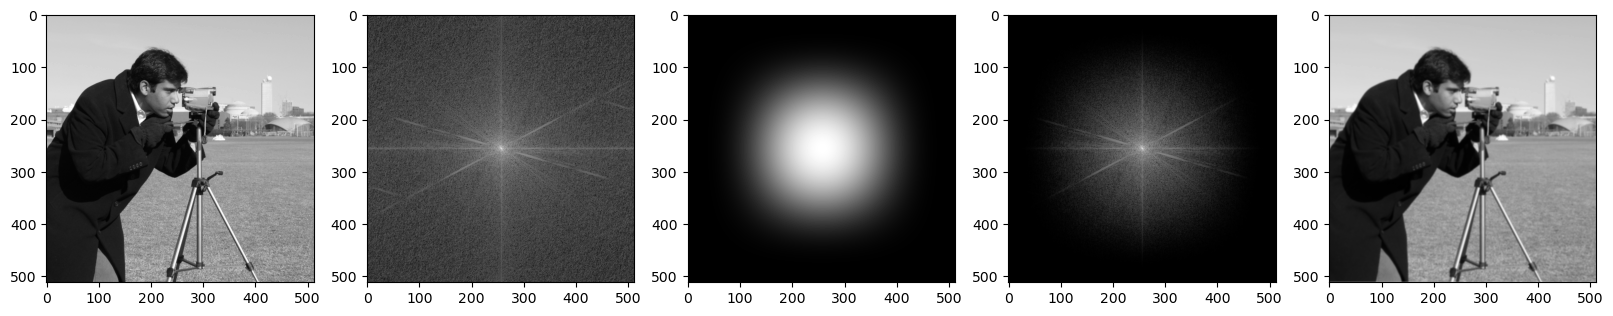

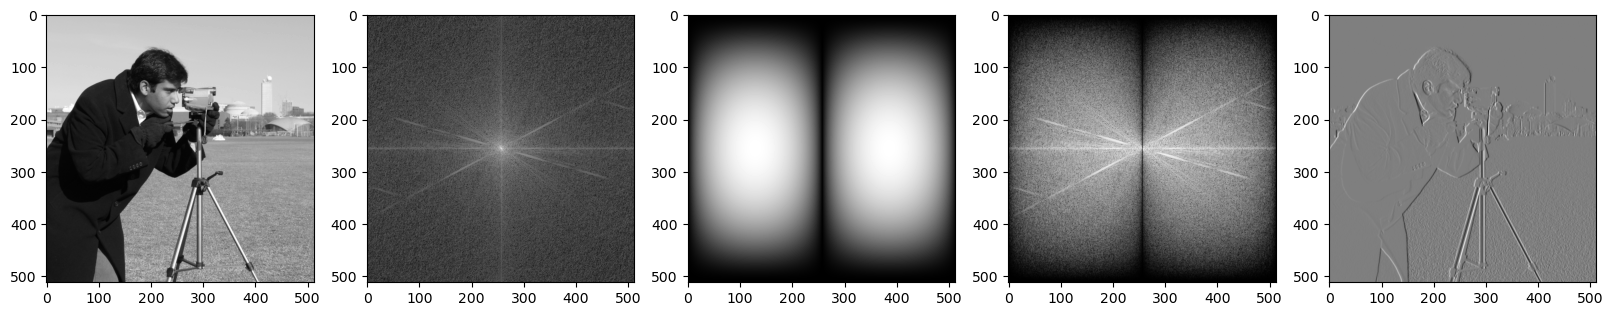

In [16]:
if __name__ == "__main__":
    verbose = True  # change if you want

    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)

    # DO NOT CHANGE
    gaussian_kernel = np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1],
    ]) / 256
    image_gaussian = convolve_im(im, gaussian_kernel, verbose)

    # DO NOT CHANGE
    sobel_horizontal = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    image_sobelx = convolve_im(im, sobel_horizontal, verbose)

    utils.save_im("camera_gaussian.png", image_gaussian)
    utils.save_im("camera_sobelx.png", image_sobelx)